https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/open-MODIS-hdf4-files-python/


In [1]:
# Import packages
import os
import re  # regular expressions
import warnings
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import earthpy.mask as em

warnings.simplefilter('ignore')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'nyu', 'rbda_project_data'))


In [2]:
# Create a path to the pre-fire MODIS h4 data
vegetation_unpacked_path = os.path.join("vegetation_indices_11_28",
                             "vegetation_indices_unpacked_test", 
                              "MOD13A_unpacked.hdf")


In [3]:
# View dataset metadata
with rio.open(vegetation_unpacked_path) as dataset:
    print(dataset)
    hdf4_meta = dataset.meta

# Notice that there are metadata at the highest level of the file
hdf4_meta


<open DatasetReader name='vegetation_indices_11_28/vegetation_indices_unpacked_test/MOD13A_unpacked.hdf' mode='r'>


{'driver': 'HDF4',
 'dtype': 'float_',
 'nodata': None,
 'width': 512,
 'height': 512,
 'count': 0,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

In [4]:
# Print all of the subdatasets in the data
with rio.open(vegetation_unpacked_path) as dataset:
    crs = dataset.read_crs()
    for name in dataset.subdatasets:
        print(name)


HDF4_SDS:UNKNOWN:vegetation_indices_11_28/vegetation_indices_unpacked_test/MOD13A_unpacked.hdf:0
HDF4_SDS:UNKNOWN:vegetation_indices_11_28/vegetation_indices_unpacked_test/MOD13A_unpacked.hdf:1
HDF4_SDS:UNKNOWN:vegetation_indices_11_28/vegetation_indices_unpacked_test/MOD13A_unpacked.hdf:2
HDF4_SDS:UNKNOWN:vegetation_indices_11_28/vegetation_indices_unpacked_test/MOD13A_unpacked.hdf:3
HDF4_SDS:UNKNOWN:vegetation_indices_11_28/vegetation_indices_unpacked_test/MOD13A_unpacked.hdf:4
HDF4_SDS:UNKNOWN:vegetation_indices_11_28/vegetation_indices_unpacked_test/MOD13A_unpacked.hdf:5
HDF4_SDS:UNKNOWN:vegetation_indices_11_28/vegetation_indices_unpacked_test/MOD13A_unpacked.hdf:6
HDF4_SDS:UNKNOWN:vegetation_indices_11_28/vegetation_indices_unpacked_test/MOD13A_unpacked.hdf:7
HDF4_SDS:UNKNOWN:vegetation_indices_11_28/vegetation_indices_unpacked_test/MOD13A_unpacked.hdf:8


In [5]:
# Create list to append arrays (of all type of data)
vegetation_data = []
vegetation_names = []

# Open the precipitation HDF5 file 
with rio.open(vegetation_unpacked_path) as dataset:
    
    # loop through each subdataset in HDF5 file
    for name in dataset.subdatasets:
        
        # Open the subdataset 
        with rio.open(name) as subdataset:
            modis_meta = subdataset.profile
            
            # Read data as a  2 dimensional array and append to list
            vegetation_data.append(subdataset.read(1))
            vegetation_names.append(name);
#             np.savetxt(str(name)[-10:-1] + ".csv", subdataset.read(1), delimiter=",")


vegetation_data_stacked = np.stack(vegetation_data)

In [6]:
vegetation_data_stacked

array([[[255, 255, 255, ...,   0,   0,   1],
        [255, 255, 255, ...,   1,   1,   1],
        [255, 255, 255, ...,   1,   1,   1],
        ...,
        [  0,   0,   0, ...,   0,   1,   1],
        [  0,   0,   0, ...,   1,   1,   1],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[255, 255, 255, ...,   0,   0,   1],
        [255, 255, 255, ...,   1,   1,   1],
        [255, 255, 255, ...,   1,   1,   1],
        ...,
        [  0,   0,   0, ...,   0,   1,   1],
        [  0,   0,   0, ...,   1,   1,   1],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[255, 255, 255, ...,   1,   1,   2],
        [255, 255, 255, ...,   2,   2,   2],
        [255, 255, 255, ...,   2,   2,   2],
        ...,
        [  1,   1,   1, ...,   1,   2,   2],
        [  1,   1,   1, ...,   2,   2,   2],
        [  1,   1,   1, ...,   1,   1,   1]],

       ...,

       [[255, 255, 255, ...,   1,   1,   1],
        [255, 255, 255, ...,   1,   1,   1],
        [255, 255, 255, ...,   1,   1,   1

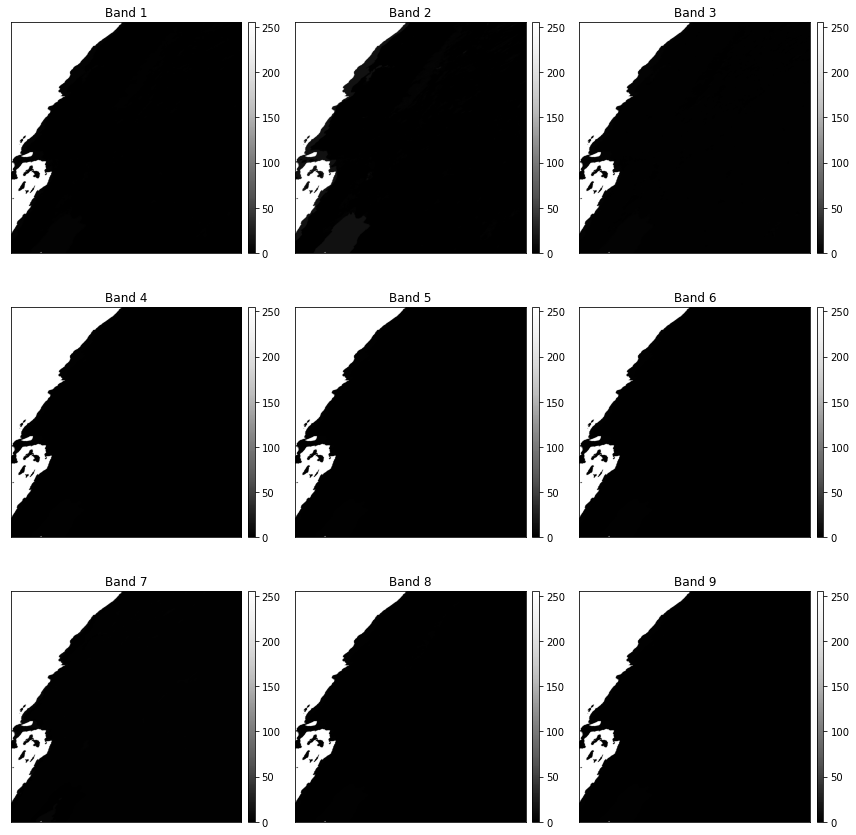

In [7]:
ep.plot_bands(vegetation_data_stacked,
              scale=False)
plt.show()

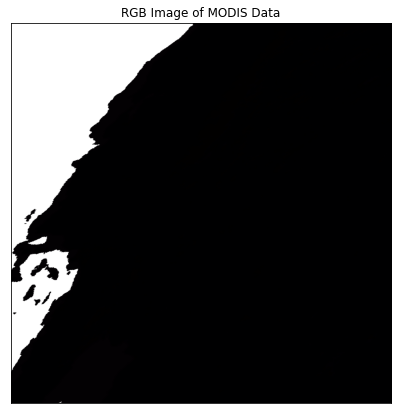

In [8]:
# Plot MODIS RGB
ep.plot_rgb(vegetation_data_stacked,
            rgb=[0, 3, 2],
            title='RGB Image of MODIS Data',
            stretch=True,
            figsize=(7, 7))

plt.show()
